# Measures_of_Central_Tendency

In [8]:
import pandas as pd
df = pd.read_csv("/Users/rahulsanjeevyeldi/Projects/data-science-statistics-journey/dataset/Titanic-Dataset.csv")

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Mean</b>

In [11]:
df['Age'].mean()

np.float64(29.69911764705882)

<b>Median</b>

In [ ]:
df['Age'].median()

<b>Mode</b>

df['Pclass'].mode()

In [ ]:
df['Sex'].mode()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

# Measures_of_Dispersion

In [1]:
import pandas as pd
df = pd.read_csv("/Users/rahulsanjeevyeldi/Projects/data-science-statistics-journey/dataset/Titanic-Dataset.csv")

<b>RANGE</b>

In [2]:

age_max = df['Age'].max()
age_min = df['Age'].min()
print(age_max,age_min)

80.0 0.42


In [3]:
age_range = age_max-age_min
print(age_range)

79.58


<b>IQR</b>

In [5]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
print('q1',q1,'q3',q3)
iqr = q3-q1
print(iqr) #how spread out the middle 50% of the data is.

q1 20.125 q3 38.0
17.875


In [6]:
q2 = df['Age'].quantile(0.50)
q2 #median value

np.float64(28.0)

<b>VARIANCE</b>

In [7]:
df['Age'].var()
#Variance= 14.52..**2=196 ≈ 211. It also measures spread, but in squared units,

np.float64(211.01912474630802)

<b>Standard Deviation</b>

In [8]:
df['Age'].std()
#mean was 35 and std is 14 it indicates that most ages fall between 21 and 49 (that’s 35 ± 14).

np.float64(14.526497332334042)

<b>Identifying outliers</b>

In [9]:
#Identifying outliers using IQR
low_bound_age = df['Age']-1.5*iqr
upper_bound_age = df['Age']+1.5*iqr
outliers_age = df[(df['Age']<low_bound_age) | (df['Age']>upper_bound_age)]
outliers_age['Age']

Series([], Name: Age, dtype: float64)

In [10]:
#Identifying outliers using IQR
low_bound_fare = df['Fare']-1.5*iqr
upper_bound_fare = df['Fare']+1.5*iqr
outliers_fare = df[(df['Fare']<low_bound_age) | (df['Fare']>upper_bound_age)]
outliers_fare['Fare']

1      71.2833
4       8.0500
11     26.5500
15     16.0000
16     29.1250
        ...   
860    14.1083
865    13.0000
872     5.0000
873     9.0000
879    83.1583
Name: Fare, Length: 217, dtype: float64

<b>Mean Absolute Deviation and Coefficient of Variation</b>

In [12]:
df_age_fare = df[['Age','Fare']]

# Drop missing values
titanic_clean = df_age_fare.dropna()

"""
Calculate MAD
It means that on average, each passenger’s age is about 11.32 years different from the average age of all passengers.
"""
mad = (titanic_clean - titanic_clean.mean()).abs().mean()

# Calculate CV
cv = titanic_clean.std() / titanic_clean.mean()

print("Mean Absolute Deviation (MAD):\n", mad)
print("\nCoefficient of Variation (CV):\n", cv)

Mean Absolute Deviation (MAD):
 Age     11.322944
Fare    30.281589
dtype: float64

Coefficient of Variation (CV):
 Age     0.489122
Fare    1.525282
dtype: float64


# Measures_of_Shape 

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

## Skewness

### Manual data

In [14]:
data = [[10, 18, 11], [13, 15, 8], [9, 20, 3]]
df = pd.DataFrame(data)
print(df.skew())

"""
General rule of thumb
skewness ~ 0 symmetrical distribution
skewness > 0 right skewed
skewness < 0 left skewed
"""


0    1.293343
1   -0.585583
2   -0.722109
dtype: float64


'\nGeneral rule of thumb\nskewness ~ 0 symmetrical distribution\nskewness > 0 right skewed\nskewness < 0 left skewed\n'

### Titanic

Skewness values for numerical features:
 Age     0.388290
Fare    4.643848
dtype: float64


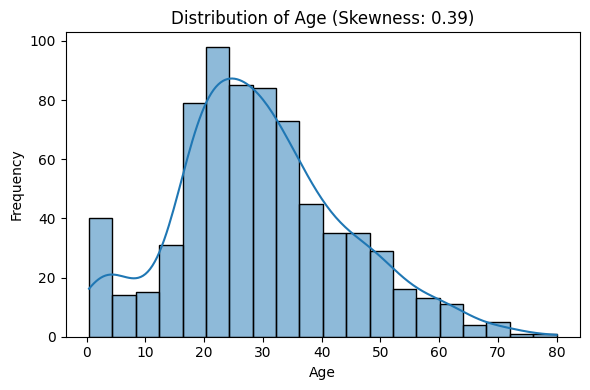

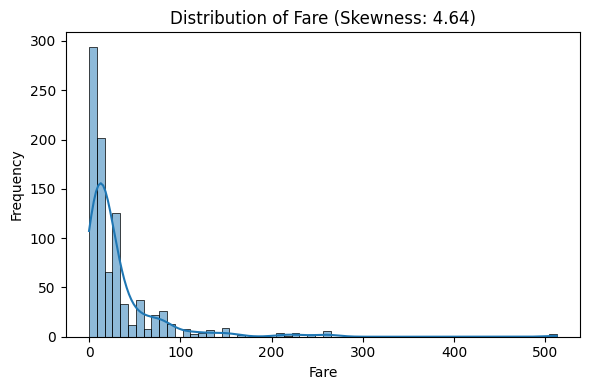

In [15]:
# Load Titanic dataset from a local CSV file
titanic = pd.read_csv('/Users/rahulsanjeevyeldi/Projects/data-science-statistics-journey/dataset/Titanic-Dataset.csv')  # Replace with your actual path if needed

#Select your columns to calculate skewness and plot
df = titanic[['Age','Fare']].dropna()

# Calculate skewness for each column
skewness_values = df.apply(skew)

# Print skewness values
print("Skewness values for numerical features:\n", skewness_values)

# Visualize the distribution of numerical features
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(titanic[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness_values[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


## Kurtosis

### Manual

In [16]:
# Importing library
from scipy.stats import kurtosis

# Creating a dataset
dataset = [88, 85, 82, 97, 67, 77, 74, 86,
           81, 95, 77, 88, 85, 76, 81]

# Calculate the kurtosis
print(kurtosis(dataset, axis=0, bias=True))

-0.29271198374234686


### Titanic

Excess Kurtosis values for numerical features:
 Age      0.168637
Fare    30.699725
dtype: float64


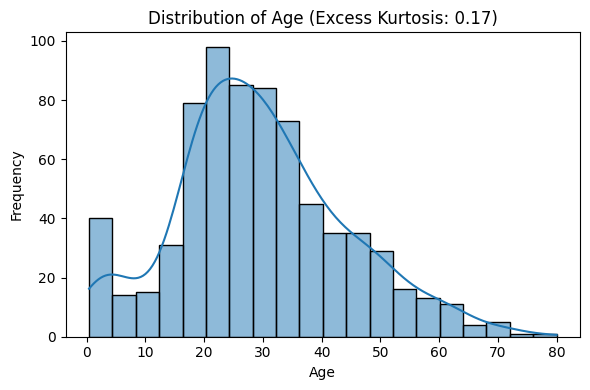

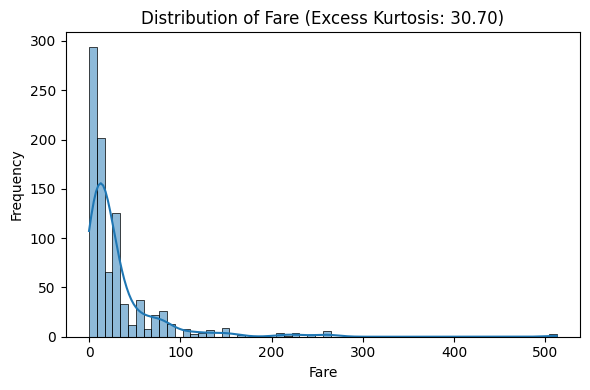

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Load Titanic dataset from a local CSV file
titanic = pd.read_csv('/Users/rahulsanjeevyeldi/Projects/data-science-statistics-journey/dataset/Titanic-Dataset.csv')  # Make sure this file is in your working directory

#Select your columns to calculate skewness and plot
df = titanic[['Age','Fare']].dropna()

# Calculate skewness for each column
kurtosis_values = df.apply(kurtosis)

# Print kurtosis values
print("Excess Kurtosis values for numerical features:\n", kurtosis_values)

# Visualize the distribution of numerical features with kurtosis
for col in df:
    plt.figure(figsize=(6, 4))
    sns.histplot(titanic[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Excess Kurtosis: {kurtosis_values[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()